In [2]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
x_vals = tf.linspace(-1., 1., 500) 
target = tf.constant(0.) 

In [3]:
sess = tf.Session()
l2_y_vals = tf.square(target - x_vals) 
l2_y_out = sess.run(l2_y_vals) 

In [4]:
l1_y_vals = tf.abs(target - x_vals) 
l1_y_out = sess.run(l1_y_vals) 

In [5]:
delta1 = tf.constant(0.25) 
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1))- 1.) 
phuber1_y_out = sess.run(phuber1_y_vals) 
delta2 = tf.constant(5.) 
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. +
                                                   tf.square((target - x_vals)/delta2))- 1.) 
phuber2_y_out = sess.run(phuber2_y_vals) 

In [6]:
x_vals = tf.linspace(-3., 5., 500) 
target = tf.constant(1.) 
targets = tf.fill([500,], 1.)

In [17]:
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals)) 
hinge_y_out = sess.run(hinge_y_vals) 

In [19]:
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals)) 
xentropy_y_out = sess.run(xentropy_y_vals) 

In [23]:
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels=targets) 
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

In [24]:
weight = tf.constant(0.5) 
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight) 
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals) 

In [26]:
unscaled_logits = tf.constant([[1., -3., 10.]]) 
target_dist = tf.constant([[0.1, 0.02, 0.88]]) 
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=target_dist) 
print(sess.run(softmax_xentropy)) 

[1.1601256]


In [29]:
unscaled_logits = tf.constant([[1., -3., 10.]]) 
sparse_target_dist = tf.constant([2]) 
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=sparse_target_dist) 
print(sess.run(sparse_xentropy))

[0.00012564]


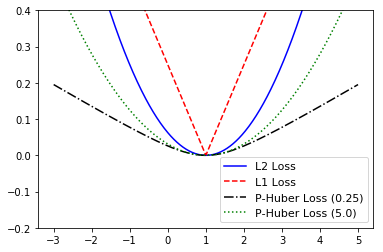

In [31]:
x_array = sess.run(x_vals) 
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss') 
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss') 
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)') 
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)') 
plt.ylim(-0.2, 0.4) 
plt.legend(loc='lower right', prop={'size': 11}) 
plt.show()

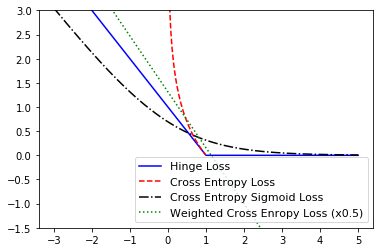

In [33]:
x_array = sess.run(x_vals) 
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss') 
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss') 
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Enropy Loss (x0.5)') 
plt.ylim(-1.5, 3) 
plt.legend(loc='lower right', prop={'size': 11}) 
plt.show()


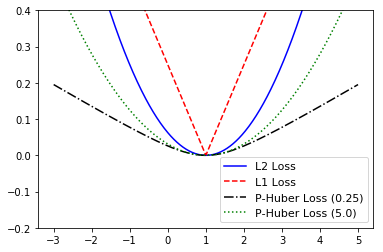